In [ ]:
# Import Pytorch libraries
import torch
from torch import nn

# Import visualization library
import matplotlib.pyplot as plt

# Verify PyTorch version
torch.__version__

'2.5.1+cu121'

In [ ]:
# Check to see if we have a GPU to use for training
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Um dispositivo {} foi detetado.'.format(device))

# Print the name of the cuda device, if detected
if device=='cuda':
    print (torch.cuda.get_device_name(device=device))

Um dispositivo cpu foi detetado.


In [ ]:
# Use Pandas to do our dataprocessing on the dataset
# Download the dataset
# IMPORTANT MOST LIKELY YOU WILL NOT BE ABLE TO RUN THIS CODE AS IT IS, TO FIX THE ERROR
# YOU MUST GO TO THE GITHUB REPOSITORY CLICK TABLE.CSV FILE, THEN RAW, THE COPY AND PASTE THE LINK TO THIS CODE AFTER THE URL = "..." IN THE ... IS WHERE YOU PLACE THE LINK
import pandas as pd
url = 'https://raw.githubusercontent.com/codedbjor/BurgerSales/refs/heads/main/Table.csv?token=GHSAT0AAAAAAC5VFSECJE3345KHPBM736DIZ4SHHSQ'
df = pd.read_csv(url)

# Explore the first 10 rows of the dataset
df.head(10)

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,9,71
1,1,1,1,0,10,137
2,0,1,0,0,10,0
3,1,0,0,1,6,107
4,1,0,0,1,8,80
5,1,1,0,0,6,110
6,1,1,1,0,8,167
7,0,0,1,1,8,0
8,1,0,1,0,8,124
9,1,1,0,0,7,95


In [ ]:
# Check the size/shape of our dataset
df.shape

(365, 6)

In [ ]:
# Calculate the mean and standard deviation of price
# Standardize numSold
priceMean = df['Price'].mean()
priceStd = df['Price'].std()
df['Price'] = (df['Price']-priceMean)/priceStd

# Calculate the mean and standard deviation of numSold
# Standardize numSold
numSoldMean = df['NumberSold'].mean()
numSoldStd = df['NumberSold'].std()
df['NumberSold'] = (df['NumberSold']-numSoldMean)/numSoldStd

In [ ]:
# Explore the dataset after the changes
df.head()

,Weekend,Sunny,Warm,BigSign,Price,NumberSold
0,1,0,0,1,0.846650,-0.023669
1,1,1,1,0,1.452587,0.743734
2,0,1,0,0,1.452587,-0.849208
3,1,0,0,1,-0.971158,0.394915
4,1,0,0,1,0.240714,0.080977


In [ ]:
# Create our PyTorch tensors and move to CPU or GPU if available
# Extract the inputs and create a PyTorch tensor x (inputs)
inputs = ['Weekend','Sunny','Warm','BigSign','Price']
x = torch.tensor(df[inputs].values,dtype=torch.float, device=device)

# Extract the outputs and create a PyTorch tensor y (outputs)
outputs = ['NumberSold']
y = torch.tensor(df[outputs].values,dtype=torch.float, device=device)

In [ ]:
# Explore the first 5 inputs
x[0:5]

tensor([[ 1.0000,  0.0000,  0.0000,  1.0000,  0.8467],
        [ 1.0000,  1.0000,  1.0000,  0.0000,  1.4526],
        [ 0.0000,  1.0000,  0.0000,  0.0000,  1.4526],
        [ 1.0000,  0.0000,  0.0000,  1.0000, -0.9712],
        [ 1.0000,  0.0000,  0.0000,  1.0000,  0.2407]])

In [ ]:
# Explore the first 5 inputs
y[0:5]

tensor([[-0.0237],
        [ 0.7437],
        [-0.8492],
        [ 0.3949],
        [ 0.0810]])

In [ ]:
# Define your PyTorch neural network
# Number of Inputs: 5
# Number of Hidden Units: 100
# Number of Hidden Layers: 1
# Activation Function:  Relu
# Number of Ouputs: 1
model = nn.Sequential(
            nn.Linear(5,100),
            nn.ReLU(),
            nn.Linear(100,1)
        )

# Move it to either the CPU or GPU depending on what we have available
model.to(device)

Sequential(
  (0): Linear(in_features=5, out_features=100, bias=True)
  (1): ReLU()
  (2): Linear(in_features=100, out_features=1, bias=True)
)

In [ ]:
import torch.optim as optim

# Meausure our neural network by mean square error
criterion = torch.nn.MSELoss()

# Train our network with a simple SGD approach
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# Train our network a using the entire dataset 5 times
for epoch in range(5):
    totalLoss = 0
    for i in range(len(x)):
        # Single Forward Pass
        ypred = model(x[i])

        # Measure how well the model predicted vs actual
        loss = criterion(ypred, y[i])

        # Track how well the model predicted
        totalLoss+=loss.item()

        # Update the neural network
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Print out our loss after each training iteration
    print ("Perdas totais: ", totalLoss)

Perdas totais:  115.92796644770357
Perdas totais:  6.584670167197942
Perdas totais:  4.272554705816177
Perdas totais:  3.412174889939113
Perdas totais:  2.987709607314123


In [ ]:
# Plot predictions vs. true values
@torch.no_grad()
def graphPredictions(model, x, y , minValue, maxValue):

    model.eval() # Set the model to inference mode

    predictions=[]  # Track predictions
    actual=[] # Track the actual labels

    x.to(device)
    y.to(device)
    model.to(device)

    for i in range(len(x)):

        # Single forward pass
        pred = model(x[i])

        # Un-normalize our prediction
        pred = pred*numSoldStd+numSoldMean
        act = y[i]*numSoldStd+numSoldMean

        # Save prediction and actual label
        predictions.append(pred.tolist())
        actual.append(act.item())

    # Plot actuals vs predictions
    plt.scatter(actual, predictions)
    plt.xlabel('Nº de Hambúrgueres Vendidos')
    plt.ylabel('Previsão de Hambúrgueres Vendidos')
    plt.plot([minValue,maxValue], [minValue,maxValue])
    plt.xlim(minValue, maxValue)
    plt.ylim(minValue, maxValue)

    # Make the display equal in both dimensions
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

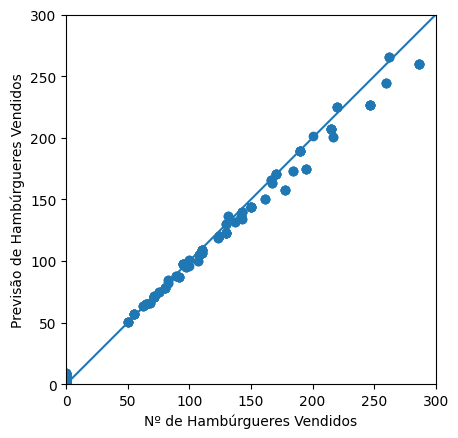

In [ ]:
graphPredictions(model, x, y, 0, 300)

In [ ]:
# Below we use the synthetic data generator forumla to
# determine what the actual result should have been.
def datasetGenerator(weekend, sunny, warm, bigsign, price):
    numlemonssold = 0
    if weekend:
        numlemonssold = (sunny*5  + int(500 / price))
        if bigsign:
            numlemonssold = 1.3 * numlemonssold
        if warm:
            numlemonssold = 2 * numlemonssold
        if sunny:
            numlemonssold = 1.25 * numlemonssold
    numlemonssold = int(numlemonssold)
    return numlemonssold

In [ ]:
def get_yes_no_input(prompt):
    while True:
        user_input = input(prompt).strip().lower()
        if user_input == "sim":
            return 1
        elif user_input == "não":
            return 0
        else:
            print("Input inválido. Por favor responda com 'sim' ou 'não'.")

weekend = get_yes_no_input("É fim de semana? (sim/não): ")
sunny = get_yes_no_input("Está sol? (sim/não): ")
warm = get_yes_no_input("Está calor? (sim/não): ")
bigsign = get_yes_no_input("Foi colucado o letreiro? (sim/não): ")

while True:
    try:
        price = float(input("Coloque o Preço: "))
        break
    except ValueError:
        print("Input inválido. Insira um valor numérico para o preço.")

# Calculate what would have been the actual result using
# the synthetic dataset's algorithm
actual = datasetGenerator(weekend, sunny, warm, bigsign, price)

# Normalize our inputs using the same values for our training
price = (price - priceMean) / priceStd

# Create our input tensor
x1 = torch.tensor([weekend, sunny, warm, bigsign, price], dtype=float)

# Use the CPU as we just need to do a single pass
model.to('cpu')

# Pass the input into the neural network
y1 = model(x1.float())

# Un-normalize our output y1
y1 = y1 * numSoldStd + numSoldMean

# Compare what your network predicted to the actual
print("Neural Network Prevê:", y1.item())
print("Resultado Real:", actual)

É fim de semana? (sim/não): sim
Está sol? (sim/não): sim
Está calor? (sim/não): sim
Foi colucado o letreiro? (sim/não): não
Coloque o Preço: 10
Neural Network Prevê: 131.9093017578125
Resultado Real: 137
